<a href="https://colab.research.google.com/github/ppkk0906/Caba_nlp/blob/main/OpenCV02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

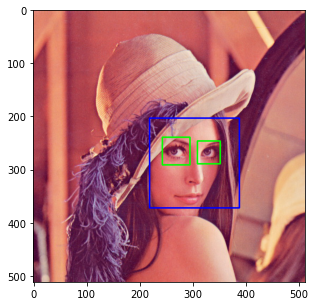

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

faceCascade = cv2.CascadeClassifier("haarcascades/haarcascade_frontalface_default.xml")
eyeCascade = cv2.CascadeClassifier("haarcascades/haarcascade_eye.xml")
src = cv2.imread("data/Lena.png")
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
faces = faceCascade.detectMultiScale(gray, 1.1, 3)
# 흑백 이미지 데이터, 얼굴 인식 영역의 최소 크기 지정

for (x,y,w,h) in faces:
    cv2.rectangle(src, (x,y), (x+w, y+h), (255,0,0), 2)
    
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = src[y:y+h, x:x+w]
    
    eyes = eyeCascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color, (ex,ey), (ex+ew, ey+eh), (0,255,0), 2)
        
        
"""
cv2.imshow('src', src)
cv2.waitKey()
cv2.destroyAllWindows()
"""
plt.figure(figsize=(5,5))
plt.imshow(cv2.cvtColor(src, cv2.COLOR_BGR2RGB))
plt.show(close=True)

In [ ]:
#!pip install youtube_dl
#!pip install pafy

In [ ]:
# 유튜브 비디오에서 얼굴 검출
import numpy as np
import pafy

#정면 얼굴 학습 파일을 가져와서 CascadeClassifier 객체 생성
faceCascade = cv2.CascadeClassifier("haarcascades/haarcascade_frontalface_default.xml")
url = "https://www.youtube.com/watch?v=S_0ikqqccJs"
video = pafy.new(url) #유튜브 동영상 프레임 가져오기
print("title =", video.title)

#최고 해상도로 영상 받기
best = video.getbest(preftype="mp4")
print("best.resolution:",best.resolution)
cap = cv2.VideoCapture(best.url)
while(True):
    retval, frame = cap.read()
    if not retval:
        break
    # 회색조로 변환 후 검출된 얼굴들의 좌표를 faces에 저장
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = faceCascade.detectMultiScale(gray)
    for(x, y, w, h) in faces:
        cv2.rectangle(frame, (x,y), (x+w, y+h), (0,0,255), 2)
    cv2.imshow("frmae", frame)
    
    key = cv2.waitKey(17) #17ms마다 사진 바꾸기
    if key == 27: # ESC 누르면 break
        break
cv2.destroyAllWindows()

title = 참이슬 아이유 X 박서준 바이럴영상(30")
best.resolution: 1280x720


[과제] 선호하는 유튜브 영상을 가져와서 얼굴인식 구현하기

[도전과제] 적합한 유튜브 영상을 가져와서 웃는 얼굴만을 인식하는 솔루션 구현